# Regression model using StatsModels 

Importing all the required default packages 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

Loading the housing data

In [2]:
housing_pricing = pd.read_csv('/home/rush/Projects/DataScience/models/data/raw/house_price_regression_dataset.csv')
housing_pricing.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


Checking and visualising the data and also performing EDAs 

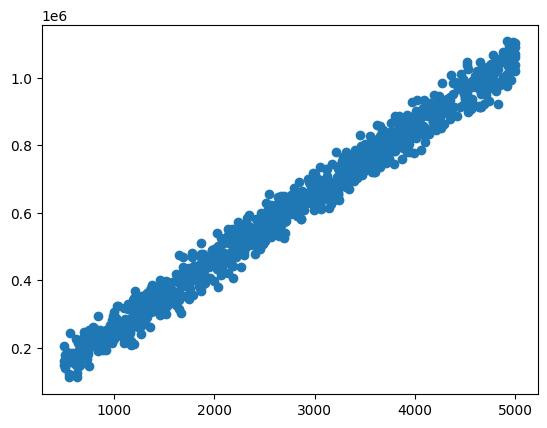

In [3]:
plt.Figure()
plt.scatter(data= housing_pricing,x= 'Square_Footage', y= 'House_Price')

<Axes: xlabel='Square_Footage', ylabel='House_Price'>

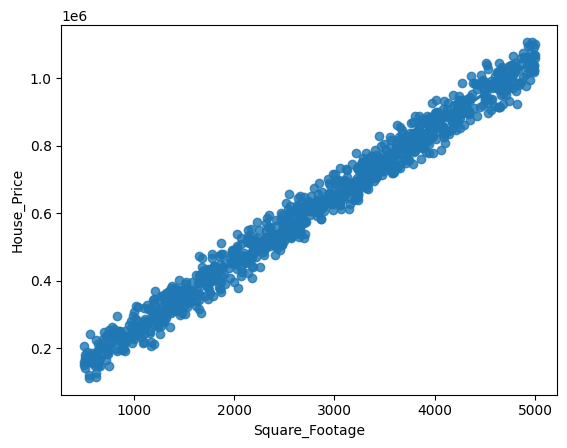

In [4]:
sns.regplot(data= housing_pricing, x= 'Square_Footage', y= 'House_Price')

Let's try to find if there are any ouliers in our data 

In [5]:
Q1 = housing_pricing.Square_Footage.quantile(0.25)
Q3 = housing_pricing.Square_Footage.quantile(0.75)

IQR = Q3-Q1

print(f'IQR: {IQR}')

sqft_low = Q1 - 1.5 * IQR
sqft_high = Q3 + 1.5 * IQR

print(f'Lowest_sqft: {sqft_low}')
print(f'Highest_sqft: {sqft_high}')

IQR: 2100.0
Lowest_sqft: -1400.5
Highest_sqft: 6999.5


let's start by importing librabies for building model using statsmodle

In [6]:
import statsmodels 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Let's pick our dependent and independent variables 

    1. In-Dependent variables: These are the variables that are not dependent on any other parameters 

        In our case it's [['Square_Footage']]
        
    2. Dependent variables: These are the variables that are dependent on the in-dependent variables, they change based on the parameters

        In our case it's [['House_Price']]

In [7]:
X = housing_pricing.Square_Footage
y = housing_pricing.House_Price

Now that we have our variables and data we split the data into training and test dataset

In our Case train - 70% : test  - 30%

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state= 42, test_size= 0.70
)

In [9]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (300,)
y_train shape: (300,)


When we build simple regression model using statsmodels we need to maually add the constant

In [10]:
X_train_sm = sm.add_constant(X_train)

print(X_train_sm.head)

<bound method NDFrame.head of      const  Square_Footage
788    1.0             577
640    1.0            1166
889    1.0            3208
550    1.0            2081
886    1.0            3572
..     ...             ...
106    1.0            2257
270    1.0            3894
860    1.0            1484
435    1.0            1865
102    1.0            1363

[300 rows x 2 columns]>


Now that we have the constant we can start with model building and fitting the model

In [11]:
model_build = sm.OLS(y_train, X_train_sm)
stats_model = model_build.fit()

In [12]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House_Price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.622e+04
Date:                Sat, 27 Sep 2025   Prob (F-statistic):          6.81e-262
Time:                        10:14:41   Log-Likelihood:                -3554.6
No. Observations:                 300   AIC:                             7113.
Df Residuals:                     298   BIC:                             7121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.593e+04   4843.453     11.548      0.000    4.64e+04    6.55e+04
Square_Footage   200.1218      1.571    127.376      0.000     197.030     203.214
==============================================================================
Omnibus:                        2.844   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.429
Skew:                           0.117   Prob(JB):                        0.297
Kurtosis:                       2.626   Cond. No.                     7.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Nowt that we have build a model let's run a new analysis over it and also check within the summary how our model performs 

1. Looking at R2 values : Our model can justify 98% of the variation of data.
2. P Values - Which is 0 (P>|t|) which tells how significant the variance is and how does it handle slope.
3. Prob (F-statistic) - It determines how well the model fits and if it's just good match and no luck.

Let's get a predicated values for the training dataset

In [13]:
y_train_pred = stats_model.predict(X_train_sm)
y_train_pred.head()

788    171400.964101
640    289272.709719
889    697921.444103
550    472384.165136
886    770765.782652
dtype: float64

Let's now move to residual analysis

ressidual = y(actual) - y(predicted)

In [14]:
res_train = y_train - y_train_pred
res_train.head()

788    14156.732380
640    30328.681821
889   -25280.657807
550   -47502.972193
886   -41380.230248
dtype: float64

/tmp/ipykernel_4365/2086060506.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res_train)


<Axes: ylabel='Density'>

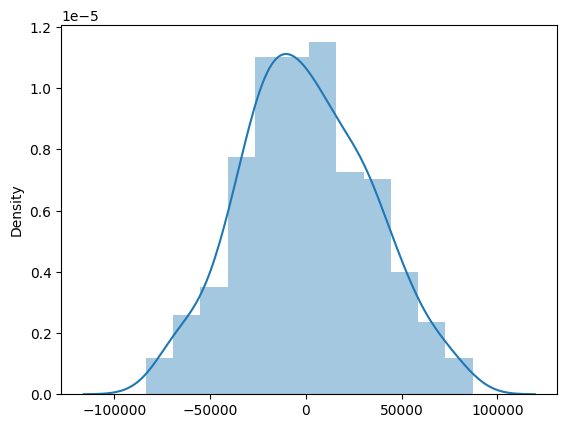

In [16]:
plt.Figure()
sns.distplot(res_train)